In [909]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [910]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [911]:
df=pd.read_csv("HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


The data consists of levels for some features, The levels are as mentioned below:

Education 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating 1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In this data we can observe the target variable is attrition and the remaining are features

In [912]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no Null values in the data set

In [913]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [914]:
df.describe(include="int64").transpose()
df.describe(include="object").transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


,count,unique,top,freq
Attrition,1470,2,No,1233
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
EducationField,1470,6,Life Sciences,606
Gender,1470,2,Male,882
JobRole,1470,9,Sales Executive,326
MaritalStatus,1470,3,Married,673
Over18,1470,1,Y,1470
OverTime,1470,2,No,1054


In [915]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

In [916]:
attrition_count=pd.DataFrame(df["Attrition"].value_counts())
attrition_count

,Attrition
No,1233
Yes,237


84% of the employees stayed in the company and 16% have moved out

In [917]:
df=df.drop(["Over18"],axis=1)   

In [918]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [919]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

In [920]:
df.drop(["EmployeeCount","EmployeeNumber","StandardHours"],axis=1, inplace=True)

In [921]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [922]:
df.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [923]:
# label_encoder = preprocessing.LabelEncoder()
# df['BusinessTravel']= label_encoder.fit_transform(df['BusinessTravel'])
# df['BusinessTravel'].unique()
# df['Department']= label_encoder.fit_transform(df['Department'])
# df['Department'].unique()
# df['JobRole']= label_encoder.fit_transform(df['JobRole'])
# df['JobRole'].unique()
# df['MaritalStatus']= label_encoder.fit_transform(df['MaritalStatus'])
# df['MaritalStatus'].unique()
# df['OverTime']= label_encoder.fit_transform(df['OverTime'])
# df['OverTime'].unique()

# #df['Gender']=df['Gender'].map({'Male':0,'Female':1}) Map doesnt work
attrition_dummies = pd.get_dummies(df['Attrition'])
attrition_dummies.head()

# # creating a dict file 
# Gender={'Male':1,'Female':0}
# # traversing through dataframe Gender column and writing values where key matches
# df.Gender=[Gender[item] for item in df.Gender]

# Field={'Life Sciences':2,'Medical':1,'Other':0,'Marketing':3,'Technical Degree':4,'Human Resources':5}
# df.EducationField=[Field[item] for item in df.EducationField]



,No,Yes
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [924]:
df.select_dtypes(['object'])

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [925]:
df = pd.concat([df, attrition_dummies] , axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,No,Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,0,8,0,1,6,4,0,5,0,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,1,10,3,3,10,7,1,7,1,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,0,7,3,3,0,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,0,8,3,3,8,7,3,0,1,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,1,6,3,3,2,2,2,2,1,0


In [926]:
df = df.drop(['Attrition','No'], axis = 1)
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Yes
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [927]:
df.rename(columns = {"Yes":"Attrition"},inplace=True)
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,1,17,3,3,5,2,0,3,0
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,1,1,9,5,3,7,7,1,7,0
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,2,1,6,0,3,6,2,0,3,0
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,4,0,17,3,2,9,6,0,8,0


In [928]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,4,1,6,3,3,2,2,2,2,0


In [929]:
df1=df.groupby('Attrition')
df1.mean()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,6832.739659,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,4787.092827,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089,-0.159205
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363,-0.056652
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406,0.077924
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065,-0.031373
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999,-0.103369
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123,-0.006846
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976,-0.130016
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281,-0.169105
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656,-0.103481
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079,-0.159840


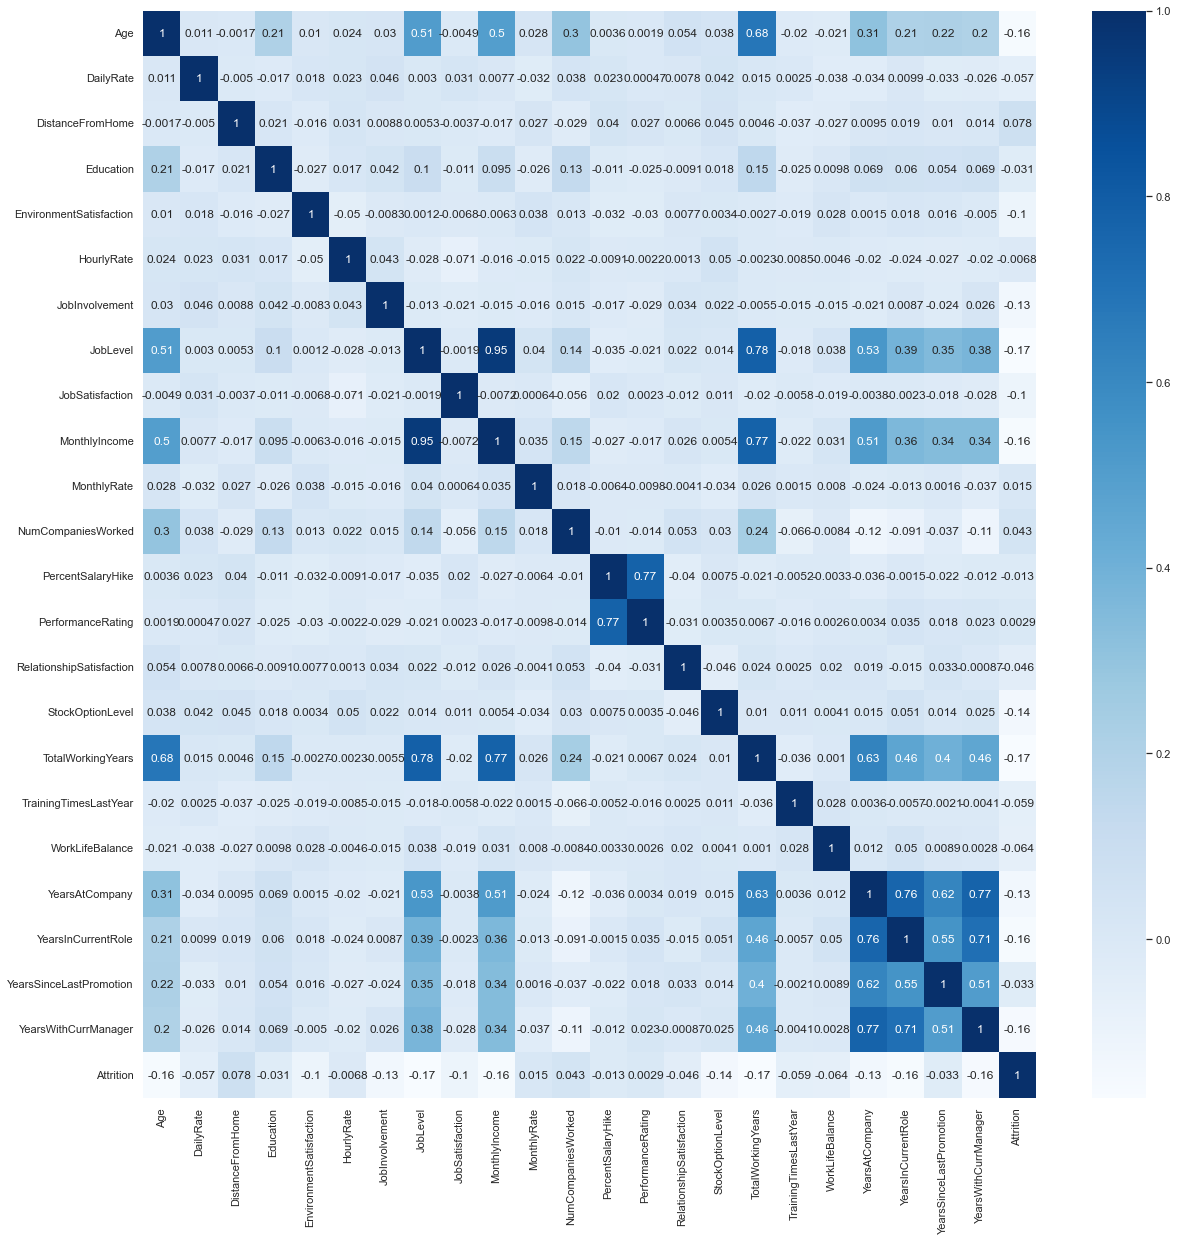

In [930]:
corr=df.corr()
corr=(corr)
plt.figure(figsize=(20, 20))
sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True,cmap="Blues")
corr


In [931]:
col = df.corr().nlargest(20, "Attrition").Attrition.index

In [932]:
df['income_range']= pd.cut(df['MonthlyIncome'],[1000,5000,10000,15000,20000])

Text(0.5, 1.0, 'Employee Salary Attrition Distribution')

[]

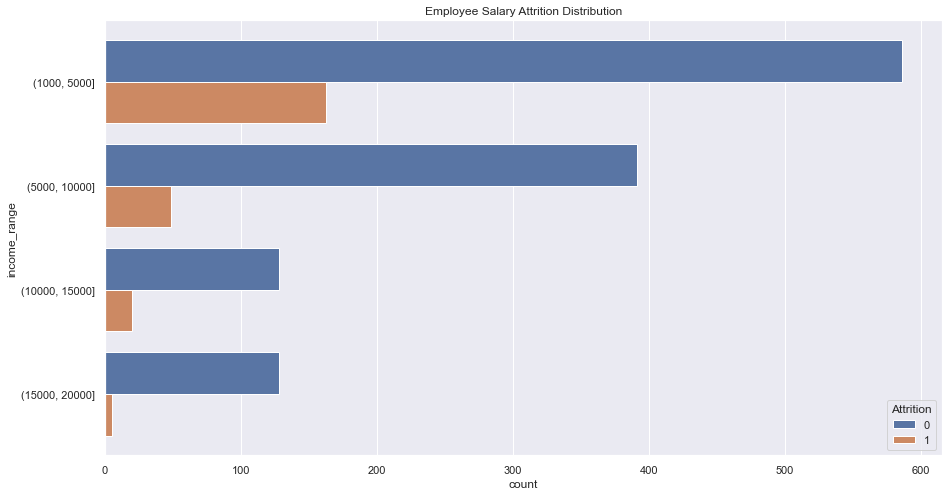

In [933]:
sns.countplot(y='income_range',hue='Attrition',data=df).set_title('Employee Salary Attrition Distribution')
plt.plot()

In [934]:
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,income_range
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,0,8,0,1,6,4,0,5,1,"(5000, 10000]"
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,1,10,3,3,10,7,1,7,0,"(5000, 10000]"
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,0,7,3,3,0,0,0,0,1,"(1000, 5000]"
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,0,8,3,3,8,7,3,0,0,"(1000, 5000]"
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,1,6,3,3,2,2,2,2,0,"(1000, 5000]"


Text(0.5, 1.0, 'Employee Income by Gender ')

<Figure size 720x720 with 0 Axes>

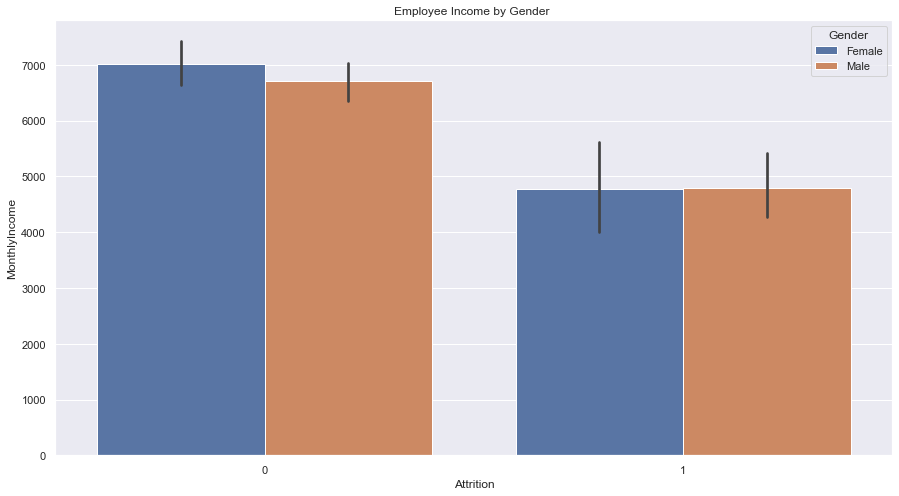

<Figure size 720x720 with 0 Axes>

In [935]:
sns.barplot(x='Attrition',y='MonthlyIncome',hue='Gender',data=df).set_title('Employee Income by Gender ')
plt.figure(figsize=(10, 10))
plt.show()

Text(0.5, 1.0, 'Employee Distance Gender Distribution')

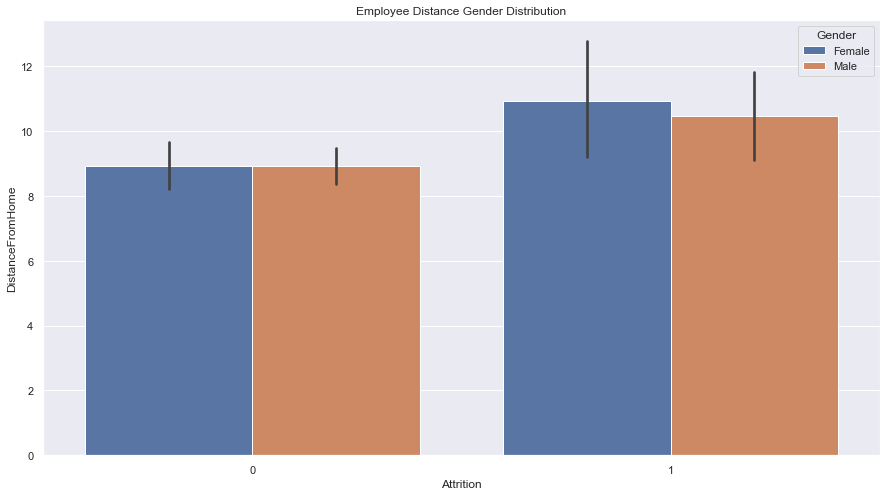

In [936]:
sns.barplot(x='Attrition',y='DistanceFromHome',hue='Gender',data=df).set_title('Employee Distance Gender Distribution')
plt.show()

Text(0.5, 1.0, 'Department with Attrition')

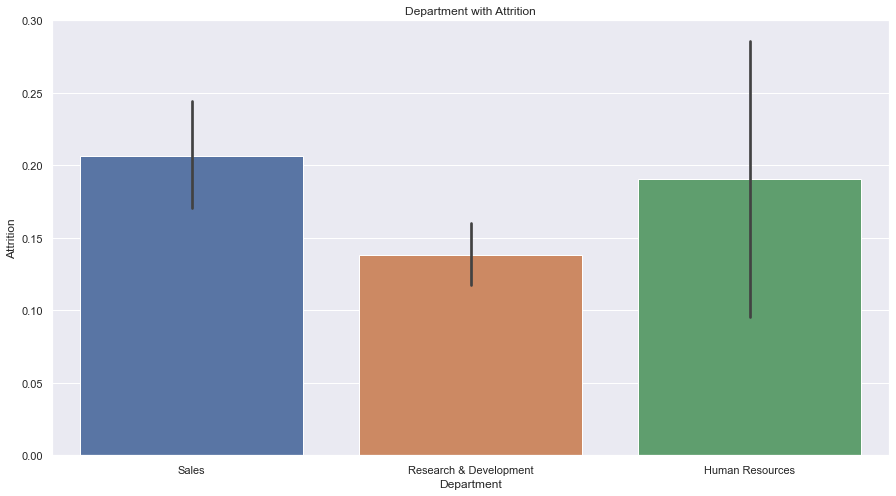

In [937]:
sns.barplot(x='Department',y="Attrition",data=df).set_title("Department with Attrition")


Text(0.5, 1.0, 'job involment with Attrition')

[]

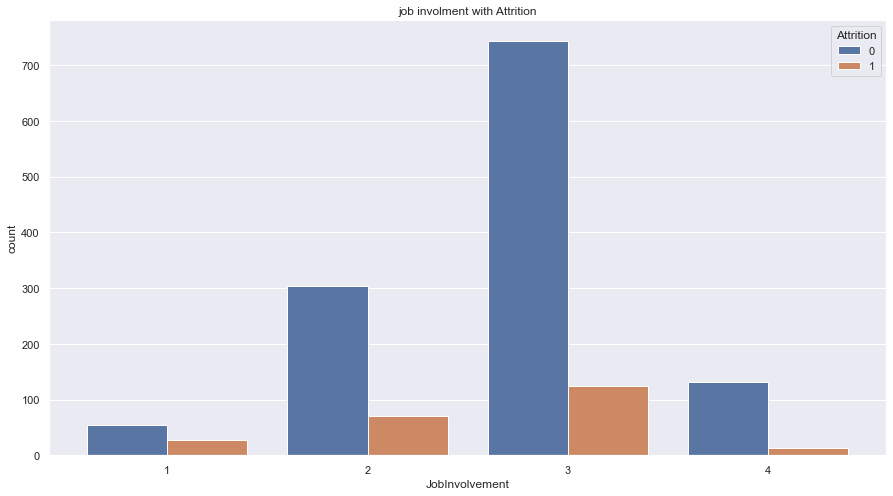

In [938]:
sns.countplot(x='JobInvolvement',hue="Attrition",data=df).set_title("job involment with Attrition")
plt.plot()

The lower the job involvement, the higher the attrition rate.

<AxesSubplot:xlabel='Age', ylabel='count'>

Text(0.5, 1.0, 'attrition distribution by age')

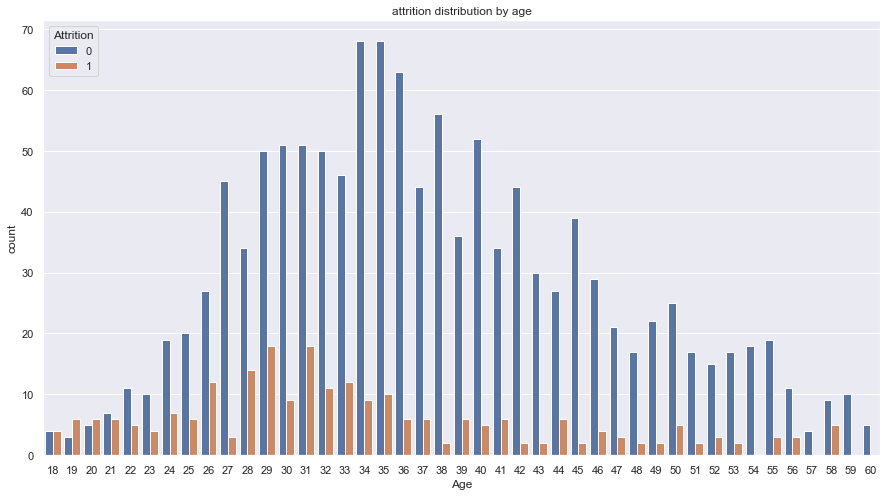

In [939]:
sns.set(rc={"figure.figsize":(15, 8)})
sns.countplot(x='Age', hue="Attrition", data=df)
plt.title("attrition distribution by age")

Employee under age 22 are more likely to leave, followed by the age group between 22 and 29. After 30, employees' attrition rate goes down

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

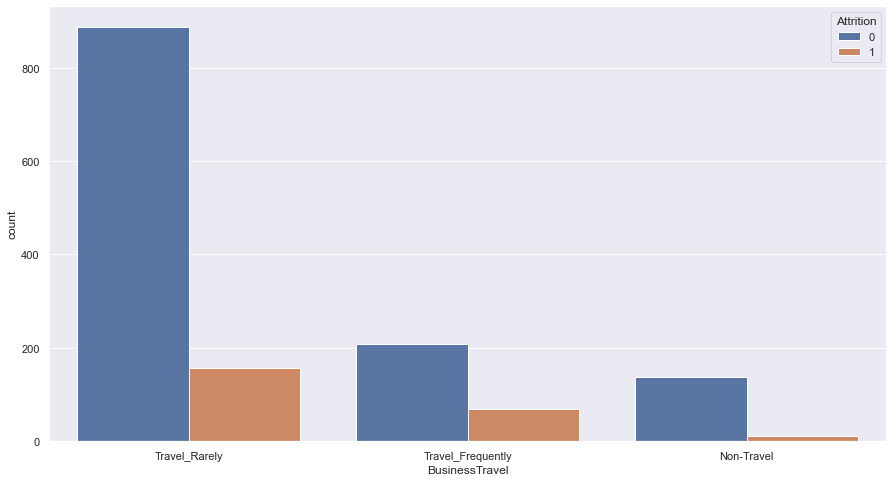

In [940]:
 sns.countplot(x='BusinessTravel', hue="Attrition", data=df)

Employee who travel frequently are likely to leave the company

<AxesSubplot:xlabel='Department', ylabel='count'>

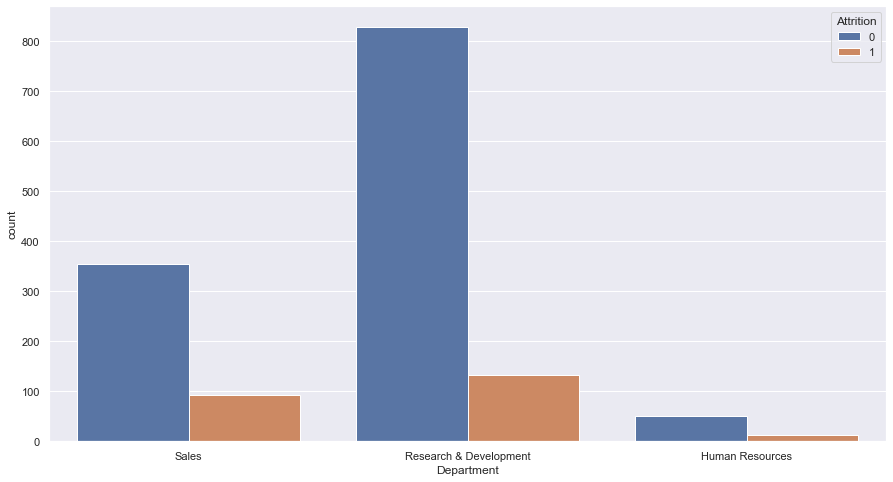

In [941]:
 sns.countplot(x='Department', hue="Attrition", data=df)

Sales department has more attrition percentage 

<AxesSubplot:xlabel='TotalWorkingYears'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '

Text(0.5, 1.0, 'Attrition Distribution by Total Working Years')

Text(0.5, 0, 'Total Working Years')

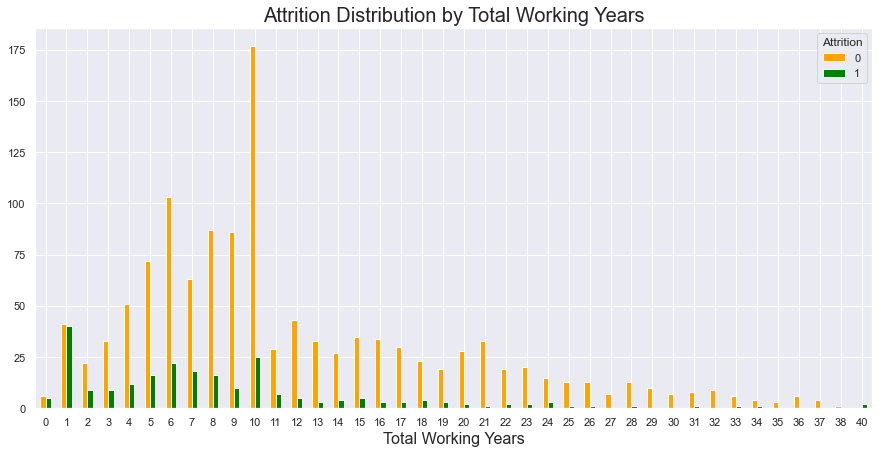

In [942]:
fig,ax = plt.subplots(figsize=(15,7))
working_years_group = df.groupby(['TotalWorkingYears','Attrition']).size().reset_index(name='number')
working_years_group = working_years_group.pivot(columns='Attrition', index='TotalWorkingYears', values = 'number')
working_years_group.plot.bar(ax=ax, color=['orange', 'green'])
plt.xticks(rotation=0)
plt.title('Attrition Distribution by Total Working Years', fontsize=20)
plt.xlabel('Total Working Years', fontsize=16)
plt.show() 


<AxesSubplot:xlabel='JobRole'>

Text(0.5, 1.0, 'Attrition Distribution by Job Role')

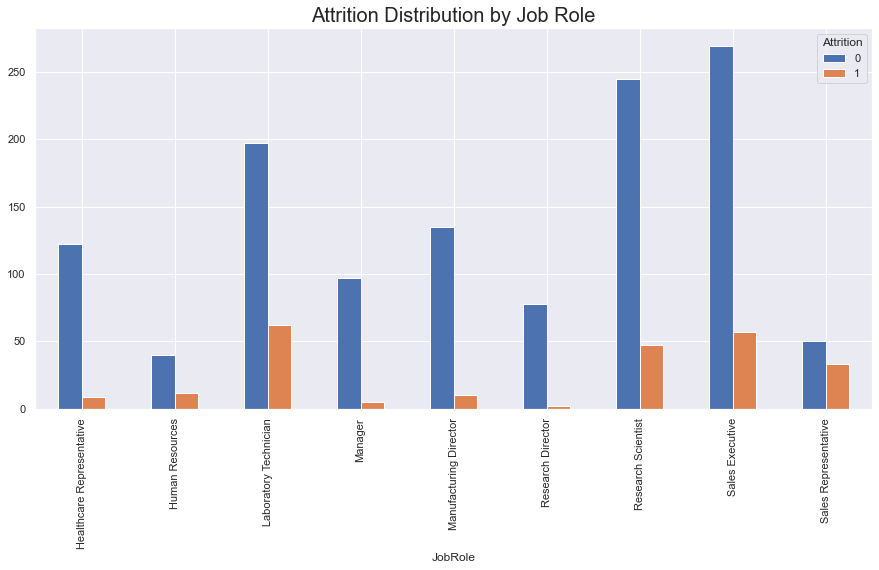

In [943]:
fig,ax = plt.subplots(figsize=(15,7))
job_role = df.groupby(['JobRole','Attrition']).size().reset_index(name='number')
job_role = job_role.pivot(columns='Attrition', index='JobRole', values = 'number')
job_role.plot.bar(ax=ax )
# plt.xticks(rotation=45)
plt.title('Attrition Distribution by Job Role', fontsize=20)
# plt.xlabel('Job Role', fontsize=16)
plt.show() 

In [944]:
# import sweetviz as sv

# my_report = sv.analyze(df)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [945]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    else:
        df[column]=LabelEncoder().fit_transform(df[column]).astype('int64')

In [946]:
df1= df.drop(['Attrition'], axis= 1)
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,income_range
0,23,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,1
1,31,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,1
2,19,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,0
4,9,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,0


In [947]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   BusinessTravel            1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   Department                1470 non-null   int64
 4   DistanceFromHome          1470 non-null   int64
 5   Education                 1470 non-null   int64
 6   EducationField            1470 non-null   int64
 7   EnvironmentSatisfaction   1470 non-null   int64
 8   Gender                    1470 non-null   int64
 9   HourlyRate                1470 non-null   int64
 10  JobInvolvement            1470 non-null   int64
 11  JobLevel                  1470 non-null   int64
 12  JobRole                   1470 non-null   int64
 13  JobSatisfaction           1470 non-null   int64
 14  MaritalStatus             1470 non-null 

In [948]:
num=df1.select_dtypes(['int64'])
num.shape
num.columns

(1470, 31)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'income_range'],
      dtype='object')

In [949]:
cat=df1.select_dtypes(['object'])
cat.shape

(1470, 0)

In [950]:
df1 = df1.drop(['income_range'], axis = 1)

In [951]:
num.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,income_range
0,23,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,1
1,31,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,1
2,19,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,0
4,9,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,0


In [952]:
df_final=pd.concat([num,cat],axis=1)
df_final.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,income_range
0,23,2,624,2,0,1,1,1,0,64,...,0,0,8,0,0,6,4,0,5,1
1,31,1,113,1,7,0,1,2,1,31,...,3,1,10,3,2,10,7,1,7,1
2,19,2,805,1,1,1,4,3,1,62,...,1,0,7,3,2,0,0,0,0,0
3,15,1,820,1,2,3,1,3,0,26,...,2,0,8,3,2,8,7,3,0,0
4,9,2,312,1,1,0,3,0,1,10,...,3,1,6,3,2,2,2,2,2,0


In [953]:
from sklearn.preprocessing import MinMaxScaler
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split


In [954]:
df2=df

In [955]:
df2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,income_range
0,23,2,624,2,0,1,1,1,0,64,...,0,8,0,0,6,4,0,5,1,1
1,31,1,113,1,7,0,1,2,1,31,...,1,10,3,2,10,7,1,7,0,1
2,19,2,805,1,1,1,4,3,1,62,...,0,7,3,2,0,0,0,0,1,0
3,15,1,820,1,2,3,1,3,0,26,...,0,8,3,2,8,7,3,0,0,0
4,9,2,312,1,1,0,3,0,1,10,...,1,6,3,2,2,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,18,1,494,1,22,1,3,2,1,11,...,1,17,3,2,5,2,0,3,0,0
1466,21,2,327,1,5,0,3,3,1,12,...,1,9,5,2,7,7,1,7,0,1
1467,9,2,39,1,3,2,1,1,1,57,...,1,6,0,2,6,2,0,3,0,1
1468,31,1,579,2,1,2,3,3,1,33,...,0,17,3,1,9,6,0,8,0,1


Splitting the data into the training and test set, with the test set being 20% of the data.Set stratify to the same as your y (which is attrition in this case). Stratify makes sure the % of the 0s and 1s are the same in the training and the test sets.

In [957]:
x= df2.drop(['Attrition'],axis = 1)
y= df2['Attrition']

In [958]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=0,stratify=attrition)

In [959]:
print('X train set shape:', x_train.shape)
print('Y train set shape:', y_train.shape)
print('X test set shape:', x_test.shape)
print('Y test set shape:', y_test.shape)

X train set shape: (1176, 31)
Y train set shape: (1176,)
X test set shape: (294, 31)
Y test set shape: (294,)


Decision tree model 

In [960]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model_tree = DecisionTreeClassifier(random_state=1)
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [961]:
model_tree.fit(x_train, y_train)
pred = model_tree.predict(x_test)

print("Accuracy Score: ", accuracy_score(pred,y_test))
print("Confusion Matrix:\n",confusion_matrix(pred,y_test))
print("Classification Report: \n",classification_report(pred,y_test))

DecisionTreeClassifier(random_state=1)

Accuracy Score:  0.7925170068027211
Confusion Matrix:
 [[218  32]
 [ 29  15]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.87      0.88       250
           1       0.32      0.34      0.33        44

    accuracy                           0.79       294
   macro avg       0.60      0.61      0.60       294
weighted avg       0.80      0.79      0.80       294



In [962]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [969]:
x_train, x_test , y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state = 0,stratify=attrition)

In [970]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [971]:
rf.score(x_train, y_train)

0.9825072886297376

In [972]:
pred = rf.predict(x_test)

In [973]:
from sklearn import metrics
print("Random Forest score")
print("Confusion Matrix:\n",confusion_matrix(pred,y_test))
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print(classification_report(pred,y_test))


Random Forest score
Confusion Matrix:
 [[364  58]
 [  6  13]]
Accuracy: 0.854875283446712
              precision    recall  f1-score   support

           0       0.98      0.86      0.92       422
           1       0.18      0.68      0.29        19

    accuracy                           0.85       441
   macro avg       0.58      0.77      0.60       441
weighted avg       0.95      0.85      0.89       441



In [968]:
result = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
result.head(50)

,Actual,Predicted
442,0,0
1091,0,0
981,1,0
785,0,0
1332,1,1
501,0,0
1058,1,0
1253,0,0
751,0,0
122,1,0
